# Exploratory Data Analysis

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np


In [3]:
np.random.seed(1)

In [4]:
# Reading the data
train=pd.read_csv('cs-training.csv')
test=pd.read_csv('cs-test.csv')

# Combine train and test in a list for easy processing
combine=[train,test]

for data in combine:
    # Dropping the index column
    data.drop(data.columns[0],axis=1,inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(6)
memory usage: 8.5 MB


# Dataset Analysis

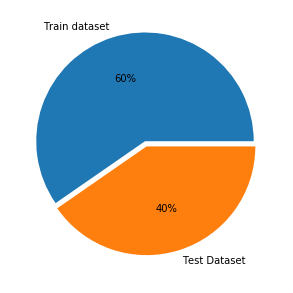

In [7]:
data_sizes=[train.shape[0],test.shape[0]]
labels=['Train dataset','Test Dataset']
plt.figure(figsize=(5,5))
plt.pie(data_sizes,labels=labels,autopct='%.0f%%',explode=[0.05,0.0])
plt.show()

In [8]:
train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

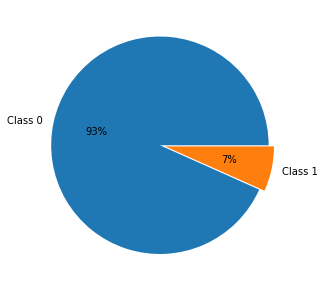

In [9]:
# Checking the data distribution
plt.figure(figsize=(5,5))
plt.pie(train['SeriousDlqin2yrs'].value_counts().values,labels=['Class 0','Class 1'],explode=[0.05,0.0],autopct='%.0f%%')
plt.show()

In [10]:
# Missing values
i=1
combine_info=[]
for data in combine:
    numbers=[]
    for column in data.columns:
        numbers.append(data[column].notna().sum())
    combine_info.append(numbers)

In [11]:
import pandas as pd
df=pd.DataFrame()
df['Attribute']=combine[0].columns
df['Count']=combine_info[0]
df

,Attribute,Count
0,SeriousDlqin2yrs,150000
1,RevolvingUtilizationOfUnsecuredLines,150000
2,age,150000
3,NumberOfTime30-59DaysPastDueNotWorse,150000
4,DebtRatio,150000
5,MonthlyIncome,120269
6,NumberOfOpenCreditLinesAndLoans,150000
7,NumberOfTimes90DaysLate,150000
8,NumberRealEstateLoansOrLines,150000
9,NumberOfTime60-89DaysPastDueNotWorse,150000


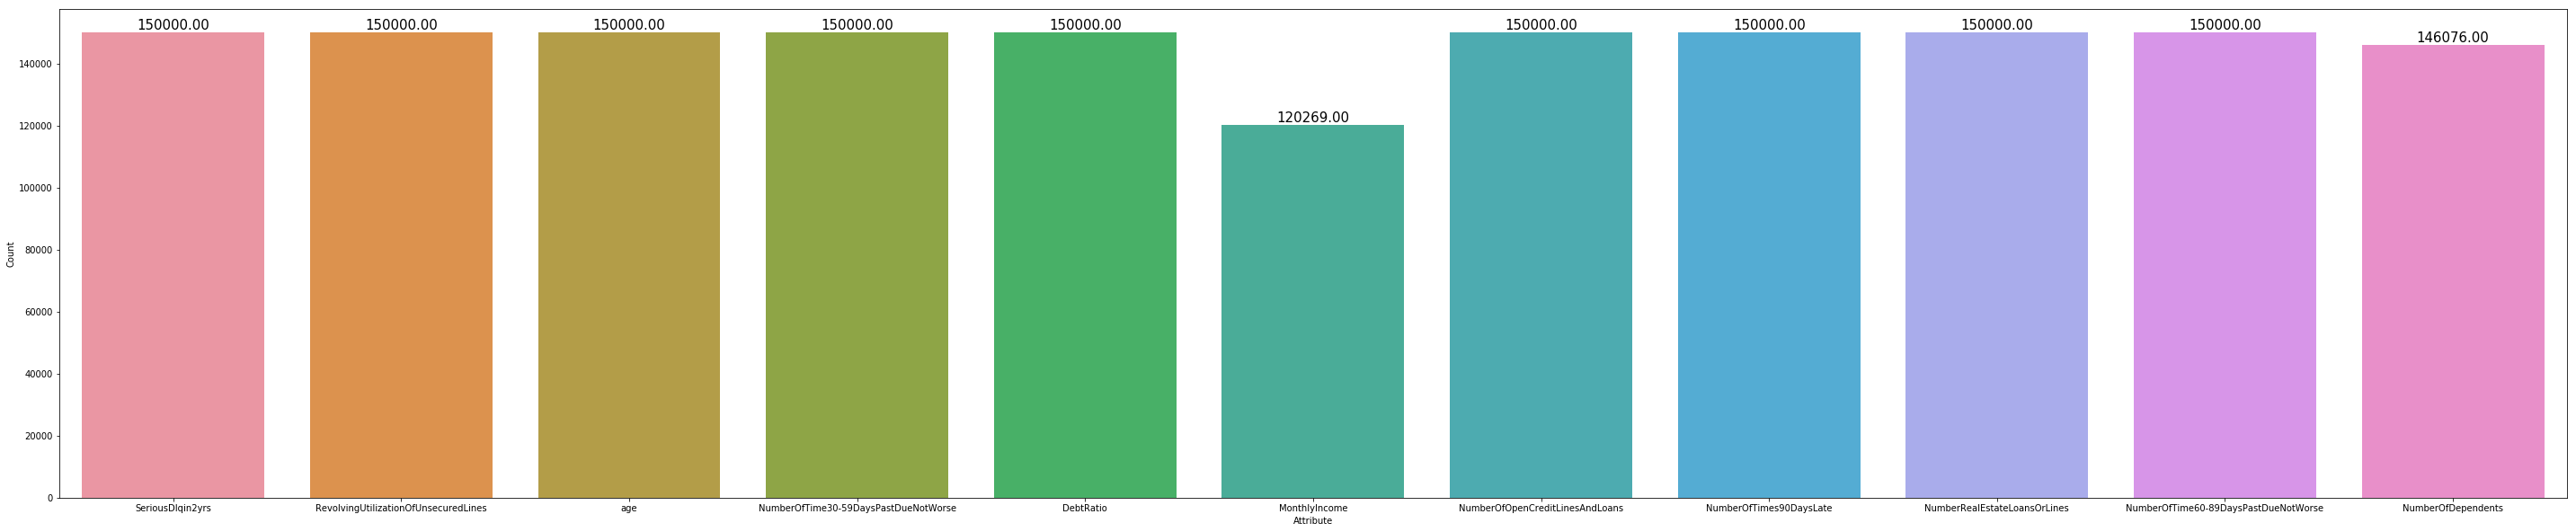

In [12]:
plt.figure(figsize=(50,10))
plots = sns.barplot(x=df['Attribute'], y=df['Count'], data=df)
                                           
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [13]:
import pandas as pd
df=pd.DataFrame()
df['Attribute']=combine[1].columns
df['Count']=combine_info[1]
df

,Attribute,Count
0,SeriousDlqin2yrs,0
1,RevolvingUtilizationOfUnsecuredLines,101503
2,age,101503
3,NumberOfTime30-59DaysPastDueNotWorse,101503
4,DebtRatio,101503
5,MonthlyIncome,81400
6,NumberOfOpenCreditLinesAndLoans,101503
7,NumberOfTimes90DaysLate,101503
8,NumberRealEstateLoansOrLines,101503
9,NumberOfTime60-89DaysPastDueNotWorse,101503


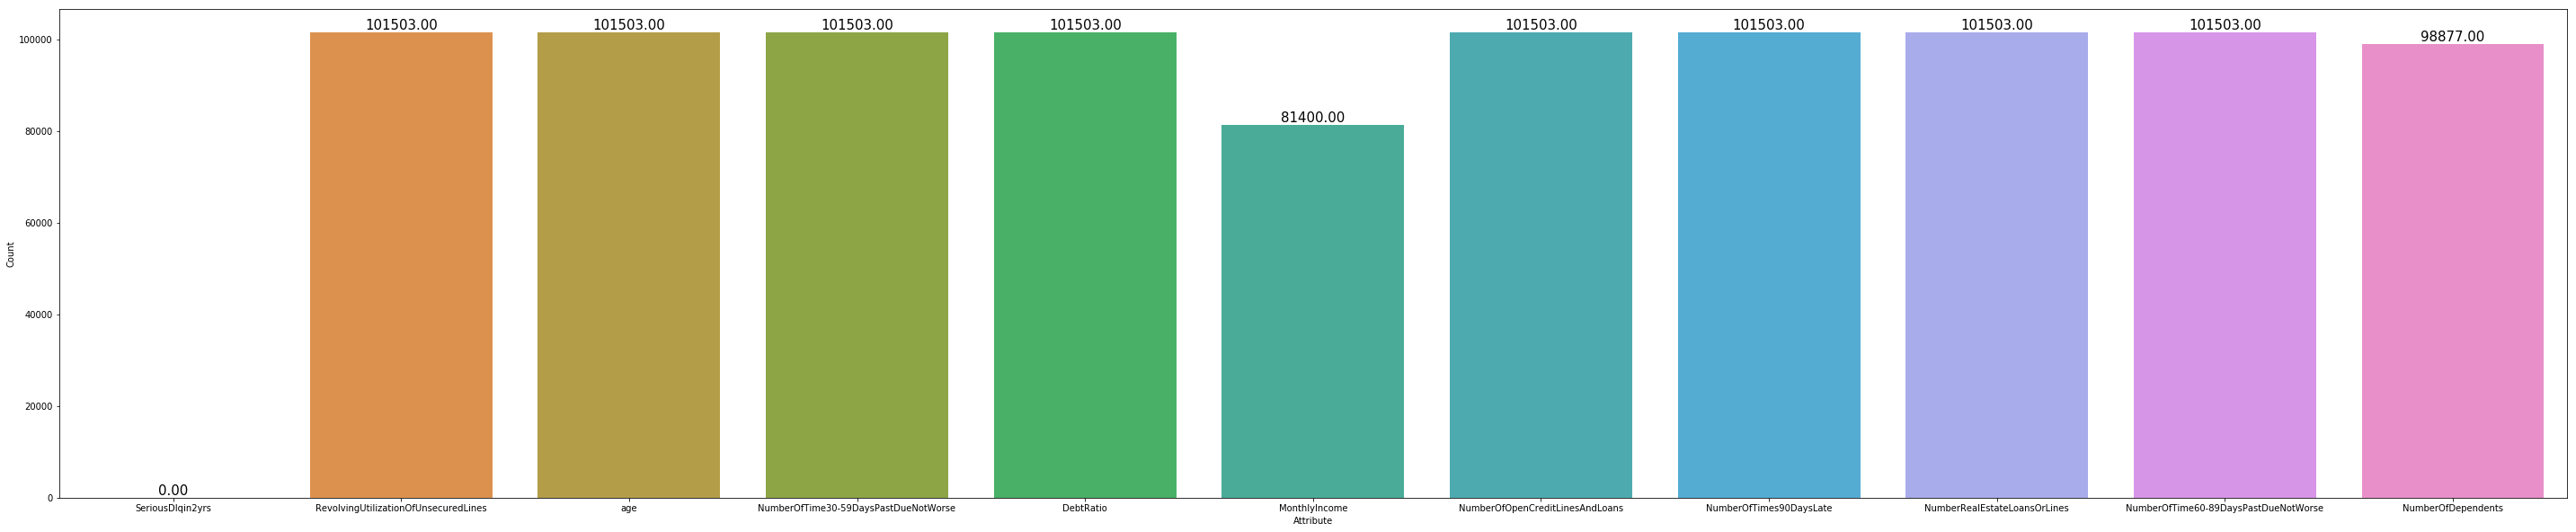

In [14]:
plt.figure(figsize=(50,10))
plots = sns.barplot(x=df['Attribute'], y=df['Count'], data=df)
                                           
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Univariate Analysis

In [290]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Dropping the row with 0 age

In [15]:
train.drop(train[train['age']==0].index,axis=0,inplace=True)

# Filling the missing values

# Using a Random Forest Regressor to predict the Number of Dependents

In [19]:
dependent_predictors=['age','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines']
x=train[train['NumberOfDependents'].notna()]
y=x['NumberOfDependents']
x=x[dependent_predictors]

from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier(random_state=1)
lr.fit(x,y)
lr.score(x,y)

0.6084066404244395

In [20]:
from tqdm import tqdm
for data in tqdm(combine):
    nod=[]
    for i,row in data.iterrows():
        if np.isnan(row['NumberOfDependents']):
            nod.append(lr.predict(np.array([row['age'],row['NumberOfOpenCreditLinesAndLoans'],row['NumberRealEstateLoansOrLines']]).reshape(1,-1)))
        else:
            nod.append(row['NumberOfDependents'])
    data['NumberOfDependents']=nod

100%|██████████| 2/2 [00:17<00:00,  9.53s/it]


In [21]:
test[test['NumberOfDependents'].isna()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


# Predicting the Monthly Income

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1)
dependent_predictors=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents']
x=train[train['MonthlyIncome'].notna()]
y=x['MonthlyIncome']
x=x[dependent_predictors]
                      


In [23]:
rfr.fit(x,y)
rfr.score(x,y)

0.7723692850950064

In [24]:
attributes=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents','MonthlyIncome']


In [25]:
for data in combine:
    mi=[]
    mi_predict=data[attributes]
    for i,row in tqdm(mi_predict.iterrows()):
        if np.isnan(row['MonthlyIncome']):
            mi.append(rfr.predict(np.array(row[:-1]).reshape(1,-1)))
        else:
            mi.append(row['MonthlyIncome'])
    data['MonthlyIncome']=mi

149999it [00:33, 4458.15it/s]
101503it [00:22, 4504.79it/s]


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null object
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      101503 non-null object
dtypes: float64(3), int64(6), object(2)
memory usage: 8.5+ MB


# Checking the Correaltion between variables

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

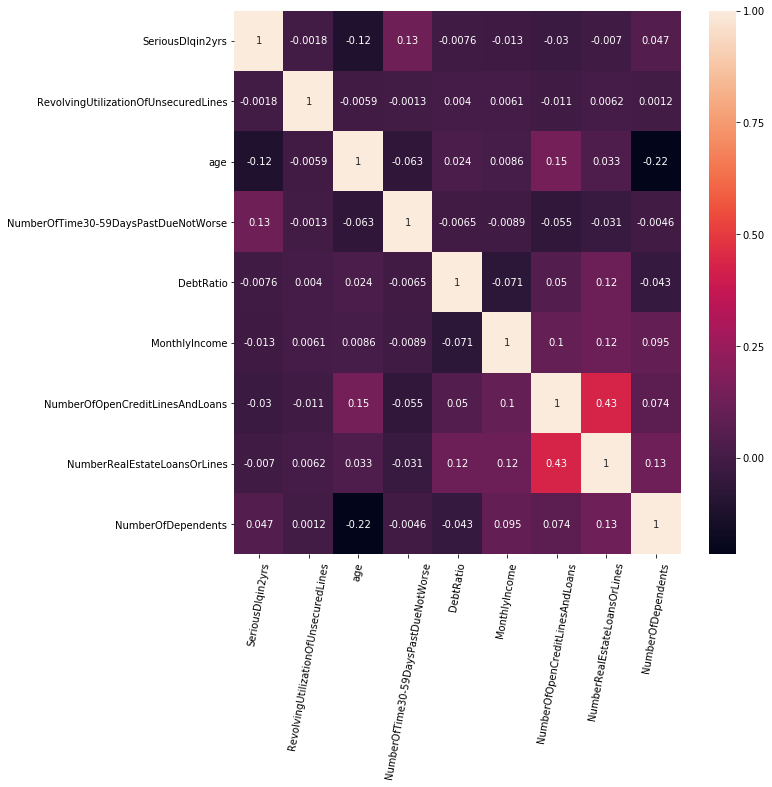

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.xticks(rotation=80)

In [53]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

In [46]:
# Dropping the attributes which has high correlation
columns_to_be_dropped=['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']
for data in combine:
    data.drop(columns_to_be_dropped,axis=1,inplace=True)

KeyError: "['NumberOfTime60-89DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'] not found in axis"

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

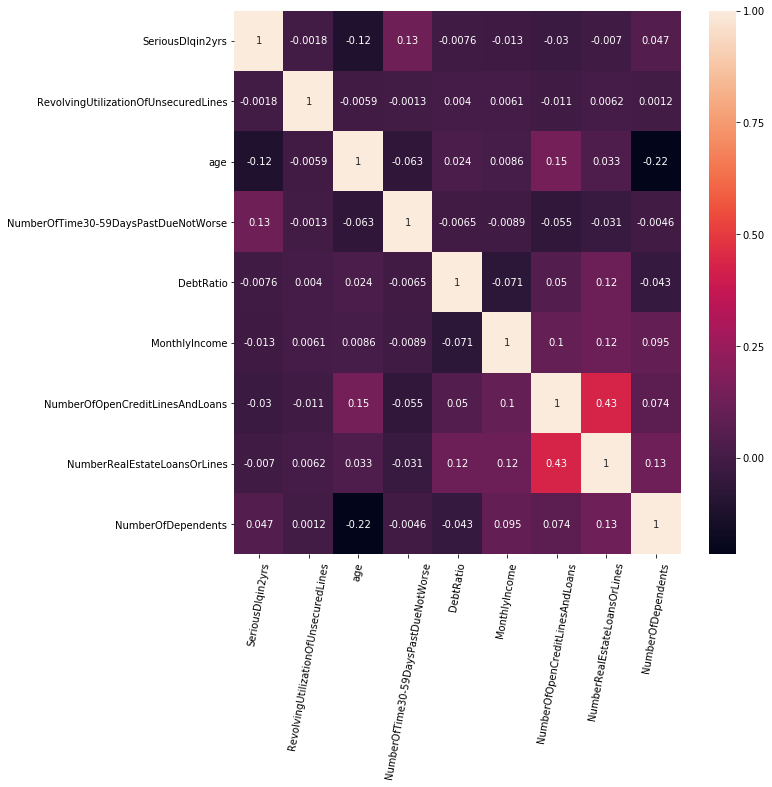

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.xticks(rotation=80)

In [ ]:
train.describe()

# Normalising the data before feeding into the deep learning network

In [28]:
columns=combine[0].columns

In [29]:
x_train=combine[0].drop(['SeriousDlqin2yrs'],axis=1)
y_train=combine[0]['SeriousDlqin2yrs']
x_test=combine[1].drop(['SeriousDlqin2yrs'],axis=1)
y_test=combine[1]['SeriousDlqin2yrs']
combine_y=[y_train,y_test]
combine_x=[x_train,x_test]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25)

# Creating a deep learning model

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [31]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9335644444444444

In [32]:
lr.score(x_test,y_test)

0.9325866666666667

# AUC SCORE


In [33]:
from sklearn.metrics import roc_auc_score

y_pred=lr.predict_proba(x_test)
temp=[]
for value in y_pred:
    temp.append(value[1])
y_pred=temp
roc_auc_score(y_test,y_pred)

0.6612177048444744

In [34]:
y_p=lr.predict(x_test)
count=[0,0]
for value in y_p:
    count[value]+=1
print((count[0]/len(y_p))*100,end='')
print('% of predictions belongs to one class')

99.80799999999999% of predictions belongs to one class


In [45]:
x_train=combine[0].drop(['SeriousDlqin2yrs'],axis=1)
y_train=combine[0]['SeriousDlqin2yrs']
x_test=combine[1].drop(['SeriousDlqin2yrs'],axis=1)
y_test=combine[1]['SeriousDlqin2yrs']
combine_y=[y_train,y_test]
combine_x=[x_train,x_test]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25)

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [47]:
import numpy as np
x_train=np.expand_dims(x_train,axis=1)
x_test=np.expand_dims(x_test,axis=1)


In [48]:
import keras 
from keras import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(16,input_shape=(1,8),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1, 16)             144       
                                                                 
 dense_19 (Dense)            (None, 1, 32)             544       
                                                                 
 dense_20 (Dense)            (None, 1, 16)             528       
                                                                 
 dense_21 (Dense)            (None, 1, 8)              136       
                                                                 
 dense_22 (Dense)            (None, 1, 4)              36        
                                                                 
 dense_23 (Dense)            (None, 1, 1)              5         
                                                                 
Total params: 1,393
Trainable params: 1,393
Non-traina

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [50]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),
          batch_size=50)

Epoch 1/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.2262 - accuracy: 0.9337 - val_loss: 0.2141 - val_accuracy: 0.9317
Epoch 2/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.2092 - accuracy: 0.9338 - val_loss: 0.2138 - val_accuracy: 0.9317
Epoch 3/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.2080 - accuracy: 0.9337 - val_loss: 0.2115 - val_accuracy: 0.9319
Epoch 4/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.2074 - accuracy: 0.9336 - val_loss: 0.2114 - val_accuracy: 0.9319
Epoch 5/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.2071 - accuracy: 0.9336 - val_loss: 0.2117 - val_accuracy: 0.9319
Epoch 6/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.2067 - accuracy: 0.9338 - val_loss: 0.2140 - val_accuracy: 0.9317
Epoch 7/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.2065 - accuracy: 0.9338 - val_loss: 0.2118 - val_accuracy:

In [51]:
from sklearn.metrics import roc_auc_score

y_pred=model.predict(x_test)
y_pred=np.squeeze(y_pred)
roc_auc_score(y_test,y_pred)

0.782847790853703

In [54]:
y_p=model.predict(x_test)
count=[0,0]
for value in y_p:
    if value>0.5:
        count[1]+=1
    else:
        count[0]+=1
print((count[0]/len(y_p))*100,end='')
print('% of predictions belongs to one class')

99.77333333333334% of predictions belongs to one class


# Balancing the dataset

In [136]:
x_train=combine[0].drop(['SeriousDlqin2yrs'],axis=1)
y_train=combine[0]['SeriousDlqin2yrs']
x_test=combine[1].drop(['SeriousDlqin2yrs'],axis=1)
y_test=combine[1]['SeriousDlqin2yrs']
combine_y=[y_train,y_test]
combine_x=[x_train,x_test]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=1)

In [137]:
indexes=random.sample(list(y_train[y_train==0].index.values),10026)
x0=x_train.loc[indexes]
y0=y_train.loc[indexes]
indexes=list(y_train[y_train==1].index.values)
x1=x_train.loc[indexes]
y1=y_train.loc[indexes]
x_train=pd.concat([x0,x1],ignore_index=True)
y_train=pd.concat([y0,y1],ignore_index=True)

In [138]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.701027397260274

In [59]:
from sklearn.metrics import roc_auc_score

y_pred=lr.predict_proba(x_test)
temp=[]
for value in y_pred:
    temp.append(value[1])
y_pred=temp
roc_auc_score(y_test,y_pred)

0.7548944941491079

In [60]:
y_p=lr.predict(x_test)
count=[0,0]
for value in y_p:
    count[value]+=1
print((count[0]/len(y_p))*100,end='')
print('% of predictions belongs to one class')

84.05866666666667% of predictions belongs to one class


# Creating a deep learning model

In [106]:
import numpy as np
x_train=np.expand_dims(x_train,axis=1)
x_test=np.expand_dims(x_test,axis=1)


In [85]:
import keras 
from keras import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(16,input_shape=(1,8),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [86]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [87]:
model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),
          batch_size=50)

Epoch 1/30
351/351 [==============================] - 2s 3ms/step - loss: 0.6443 - accuracy: 0.6199 - val_loss: 0.4866 - val_accuracy: 0.7778
Epoch 2/30
351/351 [==============================] - 1s 2ms/step - loss: 0.6034 - accuracy: 0.6962 - val_loss: 0.4009 - val_accuracy: 0.8443
Epoch 3/30
351/351 [==============================] - 1s 2ms/step - loss: 0.5835 - accuracy: 0.7188 - val_loss: 0.4295 - val_accuracy: 0.7965
Epoch 4/30
351/351 [==============================] - 1s 2ms/step - loss: 0.5719 - accuracy: 0.7251 - val_loss: 0.4185 - val_accuracy: 0.8348
Epoch 5/30
351/351 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.7246 - val_loss: 0.4555 - val_accuracy: 0.7905
Epoch 6/30
351/351 [==============================] - 1s 2ms/step - loss: 0.5601 - accuracy: 0.7281 - val_loss: 0.3950 - val_accuracy: 0.8471
Epoch 7/30
351/351 [==============================] - 1s 2ms/step - loss: 0.5577 - accuracy: 0.7280 - val_loss: 0.4613 - val_accuracy: 0.7971
Epoch 

In [88]:
from sklearn.metrics import roc_auc_score

y_pred=model.predict(x_test)
y_pred=np.squeeze(y_pred)
roc_auc_score(y_test,y_pred)

0.7901403614606972

In [66]:
y_p=model.predict(x_test)
count=[0,0]
for value in y_p:
    if value>0.5:
        count[1]+=1
    else:
        count[0]+=1
print((count[0]/len(y_p))*100,end='')
print('% of predictions belongs to one class')

78.21866666666666% of predictions belongs to one class


# Trying other models

In [139]:
rfr=RandomForestClassifier(random_state=1)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9832191780821918

In [140]:
from sklearn.metrics import roc_auc_score

y_pred=rfr.predict_proba(x_test)
temp=[]
for value in y_pred:
    temp.append(value[1])
y_pred=temp
roc_auc_score(y_test,y_pred)

0.8036954651474624

In [148]:
y_p=rfr.predict(x_test)
count=[0,0]
for value in y_p:
    if value>0.5:
        count[1]+=1
    else:
        count[0]+=1
print((count[0]/len(y_p))*100,end='')
print('% of predictions belongs to one class')

79.07733333333333% of predictions belongs to one class


# Preparing data for submission


In [141]:
x_train=combine[0].drop(['SeriousDlqin2yrs'],axis=1)

In [144]:
submission_data=test[x_train.columns]
submission_data=ss.transform(submission_data)
# submission_data=np.expand_dims(submission_data,axis=1)


In [145]:
y_predicted=rfr.predict(submission_data)
y_predicted=np.squeeze(y_predicted)

In [116]:
test.index

RangeIndex(start=0, stop=101503, step=1)

In [146]:
submission=pd.DataFrame()
submission['Id']=np.arange(1,101504)
submission['Probability']=y_predicted

In [149]:
submission.to_csv('Output.csv',index=False)

In [127]:
submission.to_csv('output.csv',index=False)

# Saving the model



In [129]:
model.save('nn.h5')

In [132]:
model1=keras.models.load_model('nn.h5')

In [147]:
submission

,Id,Probability
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1
5,6,0
6,7,0
7,8,0
8,9,0
9,10,1
